# K-Nearest-Neighbor-Algorithmus

## Bibliotheken und Daten einlesen

In [2]:
# https://stackoverflow.com/questions/45075638/graph-k-nn-decision-boundaries-in-matplotlib

In [3]:
# Bibliotheken einbinden
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

In [4]:
# Daten importieren
obst = pd.read_csv("obst.csv", sep=";")

In [5]:
# Daten ausgeben
obst.head()

,Hoehe,Breite,Frucht
0,9.3,9.7,Orange
1,9.2,9.3,Orange
2,9.5,8.9,Orange
3,9.3,7.5,Orange
4,8.3,7.7,Orange


In [6]:
# Daten in Feature-Matrix und Target-Vektor splitten
features = obst.iloc[:, 0:2]
target = obst.iloc[:, 2].replace(to_replace=['Orange', 'Zitrone'], value=[0, 1]) #iris.target

## Parameter und Einstellungen

In [7]:
# Parameter festlegen
n_neighbors = 5 # Anzahl Nachbarn des k-NN-Algorithmuses
h = .02  # Schrittgröße der Graphik

In [8]:
# Color maps festlegen
cmap_light = ListedColormap(['#F5DA81', '#F3F781'])
cmap_bold = ListedColormap(['#FFBF00', '#D7DF01'])

## Modell trainieren

In [9]:
# k-Nearest Neighbours Classifier Instanz erzeugen und trainieren
clf = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf.fit(features, target)

KNeighborsClassifier()

## Ergebnis visualisieren

In [10]:
# Decision boundary plot vorbereiten. Hierzu wird jedem Punkt in dem Gitter
# [x_min, x_max]x[y_min, y_max] die zur jeweiligen Klasse gehörende Farbe zugewiesen
x_min, x_max = features.iloc[:, 0].min() - 1, features.iloc[:, 0].max() + 1
y_min, y_max = features.iloc[:, 1].min() - 1, features.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

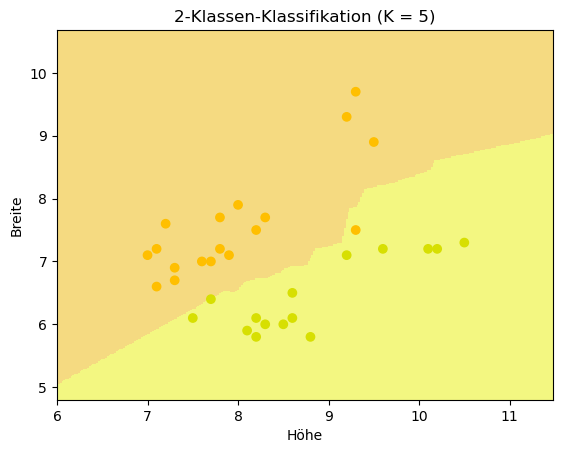

In [11]:
# Decision boundary plotten
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Punkte des Trainings-Datensatzes hinzufügen
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=target, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Klassen-Klassifikation (K = %i)"
          % (n_neighbors))
plt.xlabel("Höhe")
plt.ylabel("Breite")
plt.show()